In [101]:
import cv2 as cv   # OpenCV
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sb

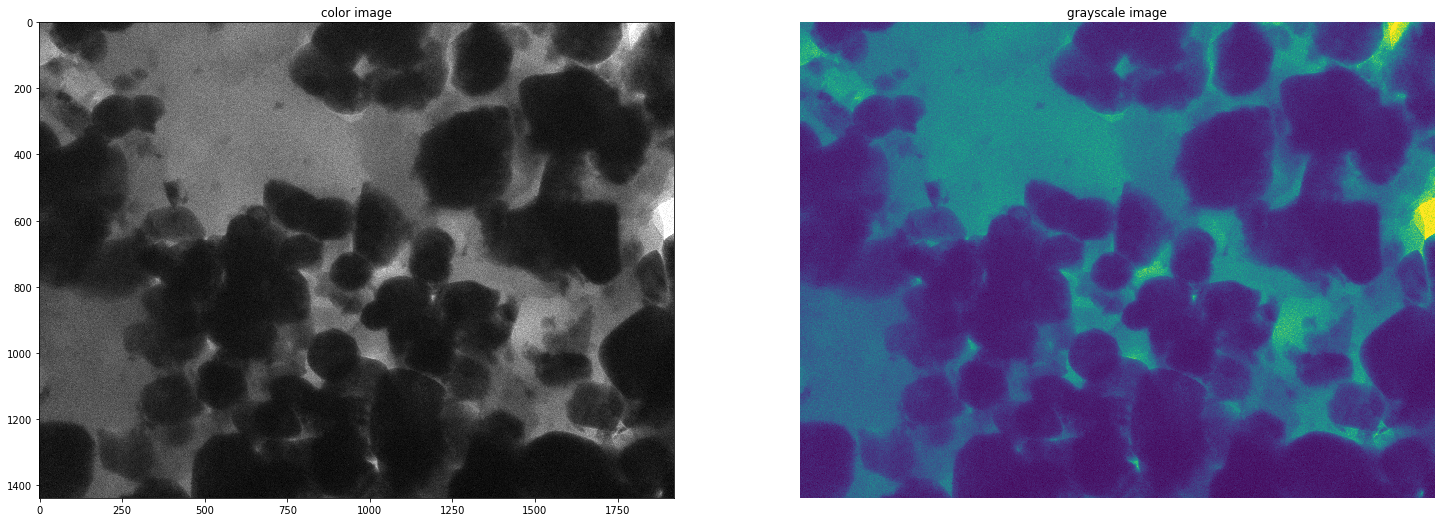

In [123]:
IMAGE_NAME = "TEM_p_cropped.tif"
# IMAGE_NAME = "500_scale_BM_20V_200_10=200_20_BM_100 no 10.png"
# IMAGE_NAME = "wave.jpg"
# 
color_image = cv.imread(IMAGE_NAME) # read a color image

# color_image = cv.cvtColor(color_image, cv.COLOR_BGR2RGB)                # convert from BGR to RGB
# not_color_image = cv.cvtColor(color_image, cv.COLOR_RGB2GRAY)                            # convert color to grayscale
gray_image = cv.imread(IMAGE_NAME, cv.IMREAD_GRAYSCALE)

# print(gray_image)
# print()
# print(gray_image[0])
# print()
# print(gray_image[1])

# reshape images to be a ndarray of pixels
color_pixels = color_image.reshape((color_image.shape[0] * color_image.shape[1], 3))
gray_pixels = color_image.reshape((gray_image.shape[0] * gray_image.shape[1], 3))

# plot input and grayscale input
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,25))
plt.axis("off")
ax1.imshow(color_image)
ax1.set_title("color image");
ax2.imshow(gray_image)
ax2.set_title("grayscale image");

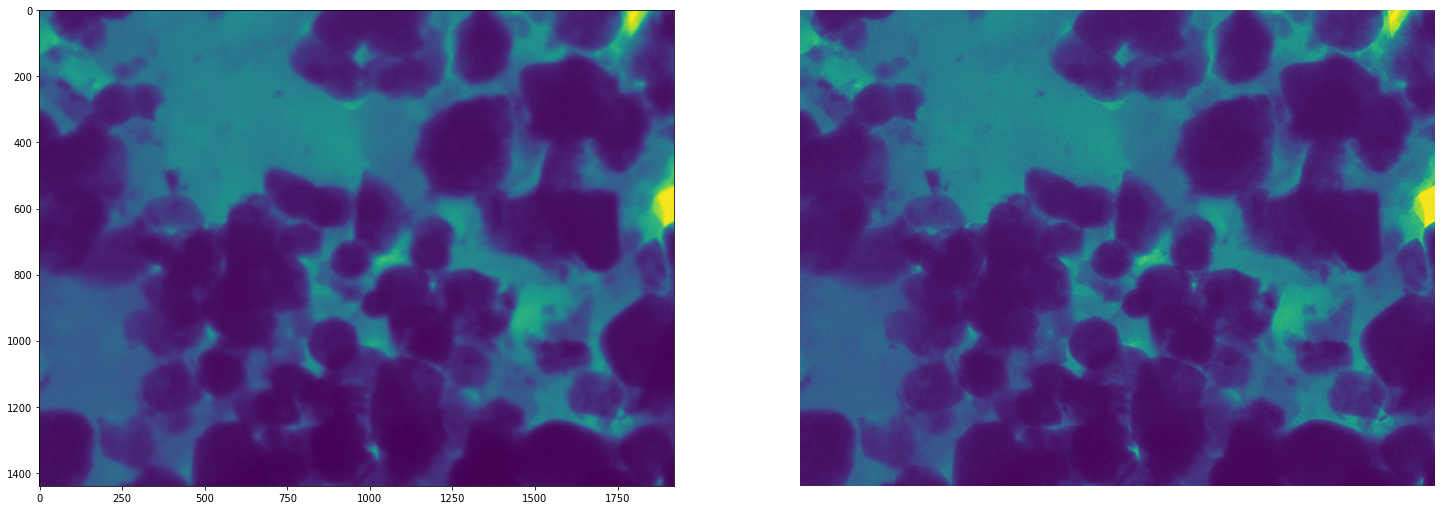

In [165]:
# apply gaussian blur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,25))
plt.axis("off")
blur_1 = cv.GaussianBlur(gray_image, (0,0) ,cv.BORDER_DEFAULT) 
ax1.imshow(blur_1)
blur_2 = cv.GaussianBlur(gray_image, (5,5) ,cv.BORDER_DEFAULT) # why only (0,0), (1,1), (5,5) work?
ax2.imshow(blur_2)

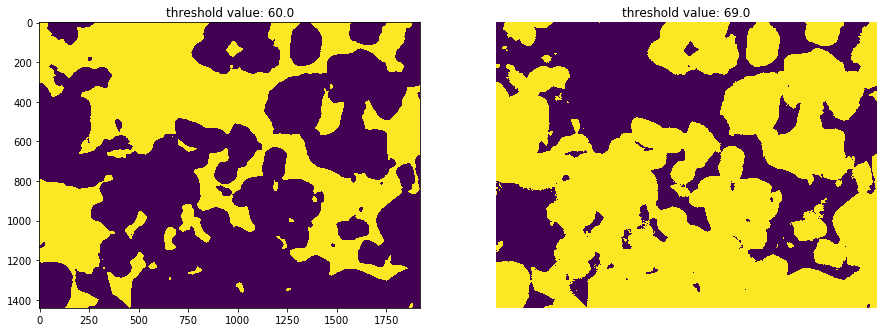

In [171]:
# auto binary threshold color image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
plt.axis("off")
ret_1, thresh_1 = cv.threshold(blur_1, 60, 255, cv.THRESH_BINARY)
ax1.imshow(thresh_1)

# auto binary threshold grayscale image with Otsu's method
ax1.set_title("threshold value: " + str(ret_1));
ax2.imshow(thresh_2)
ret_2, thresh_2 = cv.threshold(blur_2, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
ax2.set_title("threshold value: " + str(ret_2));

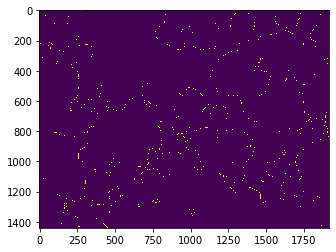

In [176]:
# find edges using Canny edge detection algorithm
edged = cv.Canny(thresh_1, 200, 255) 
plt.imshow(edged)


# get contour lines only around particles and do not approximate lines
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(thresh_2, contours, -1, (0,255,0), 3);

# display contours on thresholded image
# plt.imshow(thresh_2)

147.2756591796875


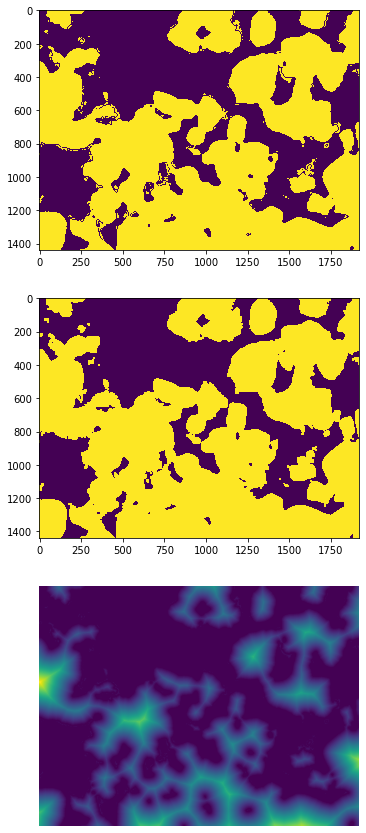

In [177]:
fig, axs = plt.subplots(3, figsize=(15,15))
plt.axis("off")

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh_2,cv.MORPH_OPEN,kernel, iterations = 2)
axs[0].imshow(opening)
axs[0].set_title("")

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
axs[1].imshow(sure_bg)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
axs[2].imshow(dist_transform)
print(ret)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

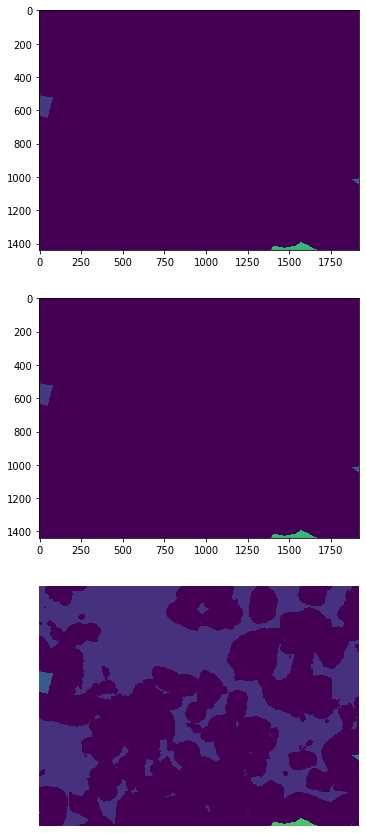

In [52]:
fig, axs = plt.subplots(3, figsize=(15,15))
plt.axis("off")

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
axs[0].imshow(markers)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
axs[1].imshow(markers)

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
axs[2].imshow(markers)

In [ ]:
markers = cv.watershed(image,markers)
thresh_1[markers == -1] = [2,2,2]
plt.imshow(markers)

In [ ]:
# out = sb.heatmap(image_pixels)